# Assignment 6 - One Body Problem

## Part A - Normal Gravity

We will integrate Newton's law of gravitational attraction using an initial time step of $dt = 0.01$, since that seems like a reasonable amount of precision, and we integrate from $t = 0$ to $t = 10$ (picked arbitrarily). The generalized gravitational force is given as
$$
    F_{grav} = -G\frac{Mm}{\|\vec r\|^{\beta}} \hat r
$$

Where $\beta \in \mathbb R$. In order to simulate normal gravity, we set $\beta = 2.0$. Equating the above to $F=m\vec a$, we get
$$
    \vec a = -G\frac{M}{\|\vec r\|^{\beta}} \hat r
$$

Now taking $\beta = 2$, since $\hat r = \frac{\vec r}{\|\vec r\|}$, and if we define $\vec r = x \hat i + y \hat j$, then $\vec a = \ddot x \hat i + \ddot y \hat j$, and from that, we get the following two equations that define the dynamics of our system

$$
    \boxed{\ddot x = -G\frac{Mx}{\|\vec r\|^3}  \\
    \ddot y = -G\frac{My}{\|\vec r\|^3}}
$$

The quantities we need to keep track of are position, velocity, kinentic and potential energy as functions of time. The positions and velocities can be tracked while numerically integrating the above. The potential energy can be found by integrating the force from $\infty$ to $\vec r$, and the result is simply to subtract 1 from the power of $\vec r$ in $F_{grav}$ and divide by $(\beta - 1)$, giving us
$$
    U_{grav} = -G \frac{Mm}{(\beta - 1)\|\vec r\|^{\beta-1}}
$$

And for $\beta = 2$, this gives us
$$
    U_{grav} = -G \frac{Mm}{\|\vec r\|}
$$

The kinetic energy $K$ is simply $\frac{1}2 m\|\vec v\|^2$, and thus the total energy that we get is
$$
    E_{Total} = U_{grav} + K = \frac{1}2 m\|\vec v\|^2 -G \frac{Mm}{\|\vec r\|}
$$

We can save some computational time by considering energy per unit mass, $E = \frac{E_{Total}}m$
$$
    \boxed{E = \frac{1}2 \|\vec v\|^2 -G \frac{M}{\|\vec r\|}}
$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
G = 6.673e-11        # Newton's Constant in MKS units
M = 1.99e30          # The mass of the Sun in kilograms
GM = G * M           # Defined for ease
AU = 149597870700.0  # Earth-Sun distance in metres
yr = 365*24*60*60.0  # One year in seconds

In [2]:
def potential(m, rVec):
    r = np.linalg.norm(rVec)
    return -G*M*m/r

def kinetic(m, vVec):
    v = np.linalg.norm(vVec)
    return 1/2 * m * v**2

In [28]:
def aVec(rVec):
    x = rVec[0]                   # Extracting x and y
    y = rVec[1]                   # from rVec
    
    RCube = (x**2 + y**2)**(1.5)  # Computing r**3 to simplify calculations
    
    ax = -GM*x/RCube              # Computing the acceleration vector's components
    ay = -GM*y/RCube              # from Newton's Laws
    
    return np.array([ax,ay])      # Return a "vector"

In [29]:
t_initial = 0                   # Initial time
t_final   = 1*yr                # Final time
dt = 1000.0                     # Time-step of 1 hour
N = int((t_final-t_initial)/dt) # Number of time-steps 

r0 = 1*AU                       # Magnitude of distance from the sun
v0 = 2*np.pi*r0/yr              # Magnitude of velocity for a circular orbit
r0Vec = r0*np.array([1.0,0.0])  # The initial position vector, along x-axis
v0Vec = v0*np.array([0.0,1.0])  # The initial velcoity vector, along y-axis

In [30]:
rVecs = np.zeros((N+1,2),float)       # An array of 2D vectors of length N+1 for position
vVecs = np.zeros((N+1,2),float)       # An array of 2D vectors of length N+1 for velocity
t     = np.zeros(N+1,float)           # An array of length N+1 for time

rVecs[0] = r0Vec                      # Setting the initial position to r0Vec
vVecs[0] = v0Vec + aVec(rVecs[0])*dt/2 # Setting the initial velocity using the leapfrog method


Note that we will not be tracking the total energy of the system since that is just the sum of the kinetic and potential energy, so for the energy array, we can simply sum the other two arrays

In [53]:
potentialArray = np.zeros(N+1,float)
kineticArray = np.zeros(N+1, float)

potentialArray[0] = potential(ME, r0Vec)
kineticArray[0] = kinetic(ME, v0Vec)

In [31]:
for i in range(1,N+1):
    t[i]     = i*dt
    rVecs[i] = rVecs[i-1] + vVecs[i-1]*dt
    vVecs[i] = vVecs[i-1] + aVec(rVecs[i])*dt


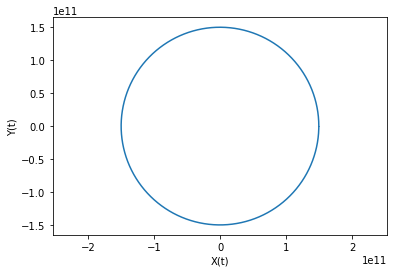

In [32]:
xArray = rVecs[:,0]         # Slicing out the x-values from rVec
yArray = rVecs[:,1]         # Slicing out the y-values from rVec

plt.plot(xArray,yArray)     # Plotting y vs. x

plt.axis('equal')           # Matplotlib commands to make the plot axes equal and change the labels
plt.xlabel("X(t)")
plt.ylabel("Y(t)")

plt.show()

In [33]:
print(rVecs)

[[ 1.49597871e+11  0.00000000e+00]
 [ 1.49597868e+11  2.98056552e+07]
 [ 1.49597859e+11  5.96113093e+07]
 ...
 [ 1.49589633e+11 -1.57049602e+09]
 [ 1.49589943e+11 -1.54069197e+09]
 [ 1.49590247e+11 -1.51088787e+09]]
